In [7]:
import pandas as pd
import seaborn as sns


In [8]:
train = pd.read_csv("train2.csv") # loading the train2 dataset from step_2
train.shape # we have 32 columns and 21201 rows

(21201, 32)

In [9]:
train.head(10) # looking at the first 10 rows of the new train dataset

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,pickup_lat,pickup_long,delivered_lat,delivered_long,Rider Id,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,1900-01-01 15:07:35,14,5,...,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191,3288,1204,14.2,1056
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,1900-01-01 09:33:45,9,5,...,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380,288,556,13.7,27
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,1900-01-01 14:13:01,11,1,...,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646,4036,2119,14.4,700
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,1900-01-01 11:10:44,30,2,...,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398,162,237,15.0,14
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,1900-01-01 16:48:54,23,5,...,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439,1062,573,13.2,100


In [10]:
# Created a new column to hold the difference between time delivered and pick up time 
train['time_difference'] = ((pd.to_datetime(train['delivered_time']) -
                            pd.to_datetime(train['arrive_pickup_time']))
                                .astype('<m8[m]').astype(int))
print (train['time_difference'] )

0        35
1        37
2        11
3        27
4        21
         ..
21196    21
21197    26
21198    69
21199    29
21200    52
Name: time_difference, Length: 21201, dtype: int64


In [11]:
#Created a new column for how months the rider has worked at the company
train['months_at_company'] = (((train['Age']/12)).astype(int))
print (train['months_at_company'] )

0        109
1         28
2         20
3         23
4         72
        ... 
21196     30
21197     20
21198     39
21199    151
21200     23
Name: months_at_company, Length: 21201, dtype: int64


In [12]:
train

,order_no,user_id,vehicle_type,platform_type,customer_type,placed_day,placed_wkday,placed_time,confirmed_day,confirmed_wkday,...,delivered_lat,delivered_long,Rider Id,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,time_difference,months_at_company
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,35,109
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,1900-01-01 11:16:16,12,5,...,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,37,28
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,1900-01-01 12:39:25,30,2,...,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,11,20
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,1900-01-01 09:25:34,15,5,...,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,27,23
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,1900-01-01 09:55:18,13,1,...,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,21,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,1900-01-01 15:54:38,20,3,...,-1.275285,36.802702,Rider_Id_953,9,1270,367,14.4,131,21,30
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,1900-01-01 10:13:34,13,6,...,-1.331619,36.847976,Rider_Id_155,770,1023,242,12.5,114,26,20
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,1900-01-01 17:06:16,7,4,...,-1.258414,36.804800,Rider_Id_697,2953,314,473,13.8,29,69,39
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,1900-01-01 09:31:39,4,3,...,-1.279210,36.794872,Rider_Id_347,1380,2451,1821,14.0,1101,29,151


Months at nthe company and Time Difference

<AxesSubplot:xlabel='months_at_company', ylabel='time_difference'>

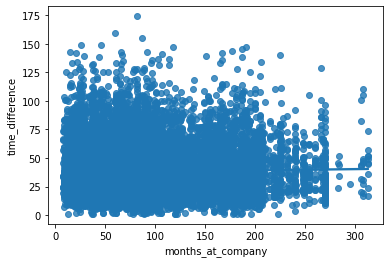

In [13]:
# use the function regplot to make a scatterplot
sns.regplot(x=train["months_at_company"], y=train["time_difference"])

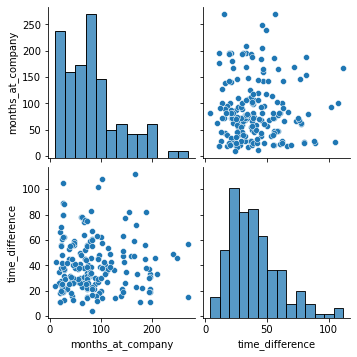

In [14]:
# limited to 3 variables and only 100 observations - for demonstration purposes only:
sns.pairplot(train[['months_at_company', 'time_difference']].head(200)) 

<AxesSubplot:xlabel='months_at_company', ylabel='time_difference'>

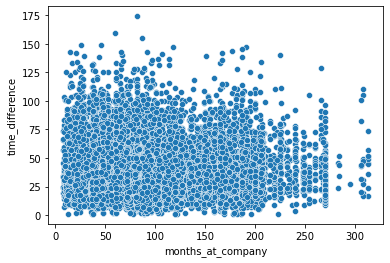

In [15]:
# runs much faster, but is limited to two variables:
sns.scatterplot(x="months_at_company", y="time_difference", data=train[train.months_at_company < 1000])

Finding Numerical Correlation

array([[<AxesSubplot:title={'center':'platform_type'}>,
        <AxesSubplot:title={'center':'placed_day'}>,
        <AxesSubplot:title={'center':'placed_wkday'}>,
        <AxesSubplot:title={'center':'confirmed_day'}>,
        <AxesSubplot:title={'center':'confirmed_wkday'}>],
       [<AxesSubplot:title={'center':'arrive_pickup_day'}>,
        <AxesSubplot:title={'center':'arrive_pickup_wkday'}>,
        <AxesSubplot:title={'center':'pickup_day'}>,
        <AxesSubplot:title={'center':'pickup_wkday'}>,
        <AxesSubplot:title={'center':'delivered_day'}>],
       [<AxesSubplot:title={'center':'delivered_wkday'}>,
        <AxesSubplot:title={'center':'distance_km'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'pickup_lat'}>,
        <AxesSubplot:title={'center':'pickup_long'}>],
       [<AxesSubplot:title={'center':'delivered_lat'}>,
        <AxesSubplot:title={'center':'delivered_long'}>,
        <AxesSubplot:title={'center':'time_pickup_to_a

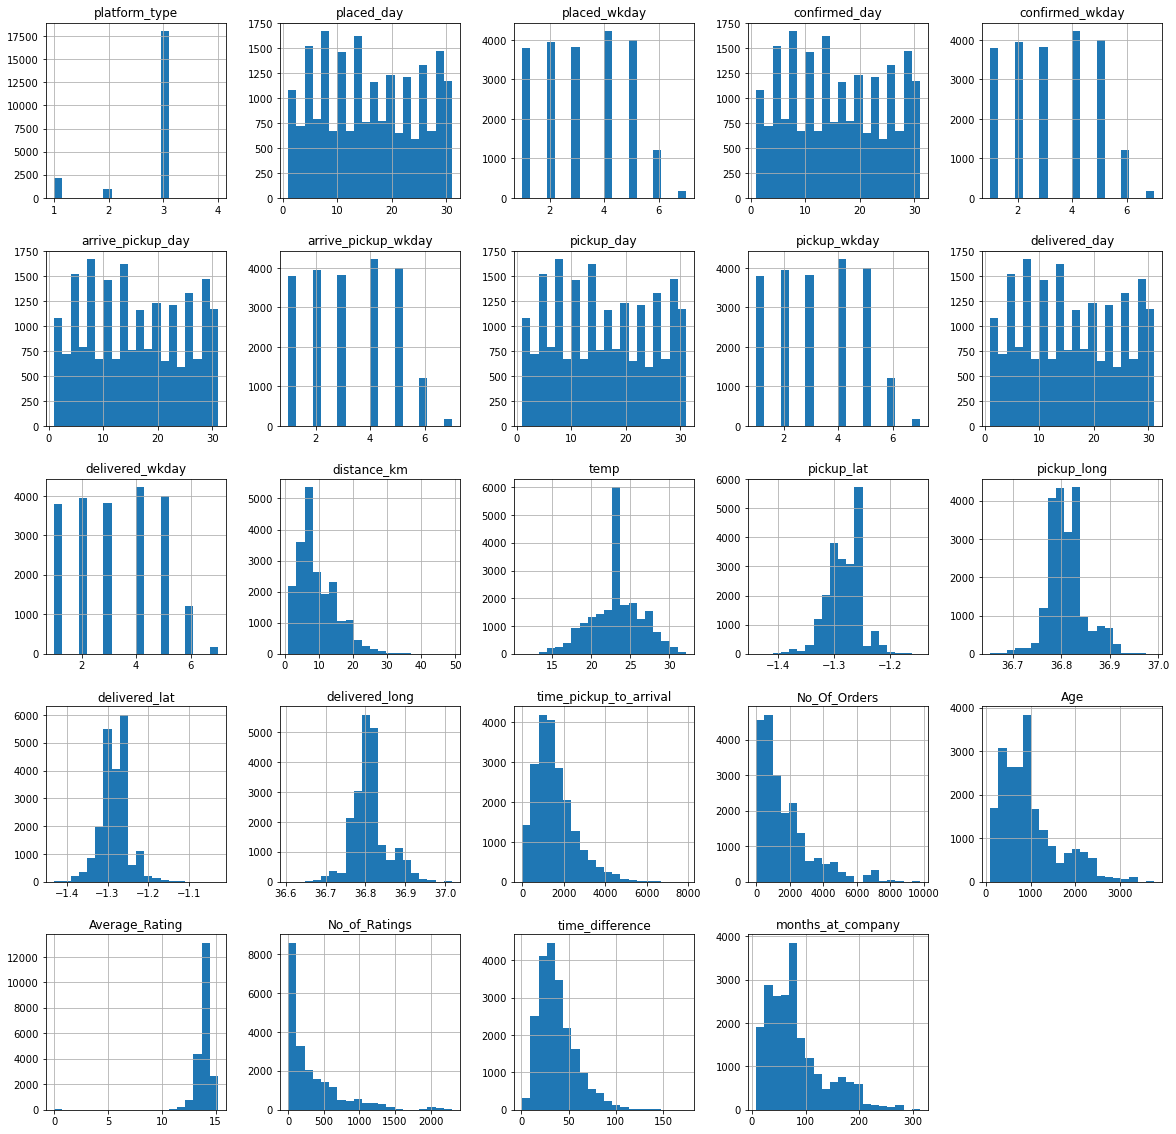

In [16]:
numeric_cols = train.columns[(train.dtypes == 'int64')|(train.dtypes == 'float64')]
train[numeric_cols].hist(bins=20, figsize=(20, 20))

Correlation
Shows the correlation between all variables in a dataset(positive, negative, 1.000) 

In [17]:
#Corrrelation Matrix
correlations = train[numeric_cols].corr()
correlations

,platform_type,placed_day,placed_wkday,confirmed_day,confirmed_wkday,arrive_pickup_day,arrive_pickup_wkday,pickup_day,pickup_wkday,delivered_day,...,pickup_long,delivered_lat,delivered_long,time_pickup_to_arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,time_difference,months_at_company
platform_type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,...,0.021327,0.006319,0.043924,-0.003827,0.024060,-0.074029,-0.014664,-0.031886,0.030783,-0.074020
placed_day,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,...,-0.005453,0.007541,0.002077,-0.014710,0.008096,-0.000107,0.012790,-0.001709,-0.010270,-0.000104
placed_wkday,-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,...,0.011008,-0.004299,-0.000875,0.009693,-0.024226,-0.015475,-0.006834,-0.025747,0.016860,-0.015486
confirmed_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,-0.010260,-0.000111
confirmed_wkday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,0.016916,-0.015526
arrive_pickup_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,-0.010260,-0.000111
arrive_pickup_wkday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,0.016916,-0.015526
pickup_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,-0.010260,-0.000111
pickup_wkday,-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,0.016916,-0.015526
delivered_day,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,-0.010260,-0.000111


/Users/emily/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_difference', ylabel='months_at_company'>

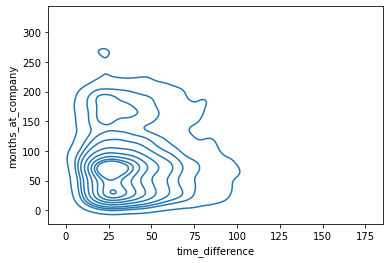

In [24]:
contour_train = sns.kdeplot(train['time_difference'],train['months_at_company'])
contour_train

<AxesSubplot:>

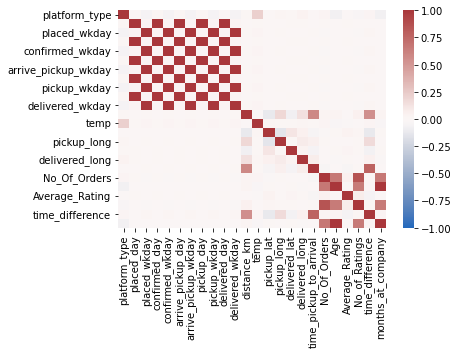

In [25]:
sns.heatmap(correlations, cmap="vlag", vmin=-1, vmax=1)

<AxesSubplot:xlabel='distance_km', ylabel='time_difference'>

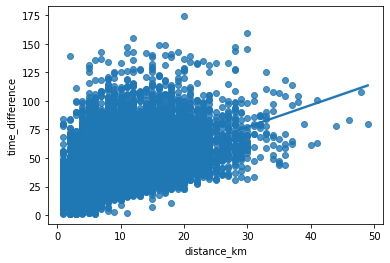

In [19]:
# use the function regplot to make a scatterplot
sns.regplot(x=train["distance_km"], y=train["time_difference"])

<AxesSubplot:xlabel='temp', ylabel='time_difference'>

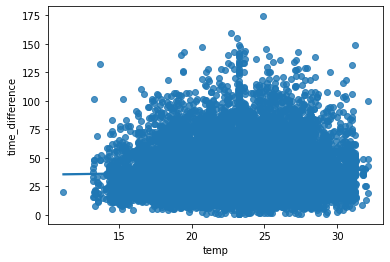

In [20]:
# use the function regplot to make a scatterplot
sns.regplot(x=train["temp"], y=train["time_difference"])